In [2]:
import pandas as pd

In [2]:
!kaggle datasets files rohanrao/formula-1-world-championship-1950-2020/

name                        size  creationDate         
-------------------------  -----  -------------------  
pit_stops.csv              287KB  2020-08-18 16:27:18  
circuits.csv                10KB  2020-08-18 16:27:18  
seasons.csv                  4KB  2020-08-18 16:27:18  
qualifying.csv             357KB  2020-08-18 16:27:18  
lap_times.csv               14MB  2020-08-18 16:27:18  
constructor_results.csv    195KB  2020-08-18 16:27:18  
driver_standings.csv       806KB  2020-08-18 16:27:18  
constructors.csv            17KB  2020-08-18 16:27:18  
constructor_standings.csv  284KB  2020-08-18 16:27:18  
drivers.csv                 91KB  2020-08-18 16:27:18  
status.csv                   2KB  2020-08-18 16:27:18  
races.csv                  111KB  2020-08-18 16:27:18  
results.csv                  1MB  2020-08-18 16:27:18  


In [3]:
!kaggle datasets download rohanrao/formula-1-world-championship-1950-2020/


  0%|          | 0.00/5.15M [00:00<?, ?B/s]
 19%|#9        | 1.00M/5.15M [00:03<00:14, 291kB/s]
 39%|###8      | 2.00M/5.15M [00:04<00:09, 366kB/s]
 58%|#####8    | 3.00M/5.15M [00:05<00:04, 475kB/s]
 78%|#######7  | 4.00M/5.15M [00:05<00:01, 618kB/s]
 97%|#########7| 5.00M/5.15M [00:06<00:00, 799kB/s]
100%|##########| 5.15M/5.15M [00:06<00:00, 842kB/s]


In [6]:
!dir

 Volume in drive C is Local Disk
 Volume Serial Number is 82DD-501E

 Directory of C:\Users\1037624\Documents\Python-Projects

08/29/2020  06:27 PM    <DIR>          .
08/29/2020  06:27 PM    <DIR>          ..
08/19/2020  11:52 AM             1,928 .gitignore
08/29/2020  06:25 PM    <DIR>          .ipynb_checkpoints
08/19/2020  11:52 AM             8,967 BlackJack Game.ipynb
08/28/2020  04:08 PM    <DIR>          django_blog
08/29/2020  06:27 PM             3,027 Formula 1 World Championship (1950 - 2020).ipynb
08/29/2020  06:27 PM         5,403,839 formula-1-world-championship-1950-2020.zip
08/29/2020  08:56 AM            99,637 Indian School Education.ipynb
08/22/2020  01:14 PM           197,969 NASA Astronauts, 1959-Present.ipynb
08/19/2020  11:52 AM                55 README.md
08/19/2020  11:52 AM             5,390 Tic Tac Toe Project.ipynb
               8 File(s)      5,720,812 bytes
               4 Dir(s)  193,932,283,904 bytes free


#### For now, I am using the data downloaded locally from kaggle, it is the same datasets but to avoid unzipping the dataset in Jupyter, I am using already zipped files

# Circuit Analysis

In [4]:
df_circuits=pd.read_csv("../Data/Formula 1 World Championship (1950 - 2020)/circuits.csv")

In [5]:
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [6]:
df_circuits.shape

(76, 9)

### Plotting the circuits on world map using folium

In [7]:
import folium

In [20]:
world_map=folium.Map()

In [21]:
world_map

### Now we have plot markers based on the coordinates for each circuit

In [10]:
circuit_loc=df_circuits[['lat','lng']]
circuit_loc

,lat,lng
0,-37.84970,144.96800
1,2.76083,101.73800
2,26.03250,50.51060
3,41.57000,2.26111
4,40.95170,29.40500
...,...,...
71,40.77690,-74.01110
72,40.37250,49.85330
73,21.01660,105.76600
74,37.22700,-8.62670


In [11]:
type(circuit_loc)

pandas.core.frame.DataFrame

In [12]:
circuit_loc_list=circuit_loc.values.tolist()
circuit_loc_list

[[-37.8497, 144.968],
 [2.76083, 101.738],
 [26.0325, 50.5106],
 [41.57, 2.26111],
 [40.9517, 29.405],
 [43.7347, 7.420560000000001],
 [45.5, -73.5228],
 [46.8642, 3.16361],
 [52.0786, -1.01694],
 [49.3278, 8.56583],
 [47.5789, 19.2486],
 [39.4589, -0.331667],
 [50.4372, 5.97139],
 [45.6156, 9.28111],
 [1.2914, 103.86399999999999],
 [35.3717, 138.92700000000002],
 [31.3389, 121.22],
 [-23.7036, -46.6997],
 [39.795, -86.2347],
 [50.3356, 6.9475],
 [44.3439, 11.7167],
 [34.8431, 136.541],
 [47.2197, 14.7647],
 [24.4672, 54.6031],
 [-34.6943, -58.4593],
 [36.7083, -6.03417],
 [38.7506, -9.394169999999999],
 [34.915, 134.221],
 [-34.9272, 138.61700000000002],
 [-25.9894, 28.0767],
 [52.8306, -1.3752799999999998],
 [19.4042, -99.0907],
 [33.4479, -112.075],
 [43.2506, 5.79167],
 [34.7333, 126.417],
 [-22.9756, -43.395],
 [42.3298, -83.0401],
 [51.3569, 0.263056],
 [52.3888, 4.54092],
 [50.9894, 5.25694],
 [47.3625, 4.89913],
 [32.7774, -96.7587],
 [33.7651, -118.189],
 [36.1162, -115.173999

In [13]:
for index in range(0, len(circuit_loc_list)):
    folium.Marker(location=circuit_loc_list[index], popup=df_circuits['name'][index]).add_to(world_map)
world_map

### Which country has most number of circuits for F1?

In [22]:
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,\N,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,\N,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,\N,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,\N,http://en.wikipedia.org/wiki/Istanbul_Park


In [24]:
country_with_most_circuits=df_circuits.groupby('country')['circuitId'].count()
country_with_most_circuits

country
Argentina        1
Australia        2
Austria          3
Azerbaijan       1
Bahrain          1
Belgium          3
Brazil           2
Canada           3
China            1
France           7
Germany          3
Hungary          1
India            1
Italy            4
Japan            3
Korea            1
Malaysia         1
Mexico           1
Monaco           1
Morocco          1
Netherlands      1
Portugal         4
Russia           1
Singapore        1
South Africa     2
Spain            6
Sweden           1
Switzerland      1
Turkey           1
UAE              1
UK               4
USA             11
Vietnam          1
Name: circuitId, dtype: int64

In [25]:
type(country_with_most_circuits)

pandas.core.series.Series

In [26]:
country_with_most_circuits=pd.DataFrame(country_with_most_circuits)

In [27]:
type(country_with_most_circuits)

pandas.core.frame.DataFrame

In [30]:
country_with_most_circuits.head()

,circuitId
country,
Argentina,1
Australia,2
Austria,3
Azerbaijan,1
Bahrain,1


In [31]:
country_with_most_circuits.sort_values(by='circuitId' ,ascending=False, inplace=True)

In [45]:
country_with_most_circuits.rename(columns={'circuitId':'# of circuits'}, inplace=True)
country_with_most_circuits.head()

,# of circuits
country,
USA,11
France,7
Spain,6
UK,4
Portugal,4


### Plot a bar chart for top 10 rows from countries with most circuits

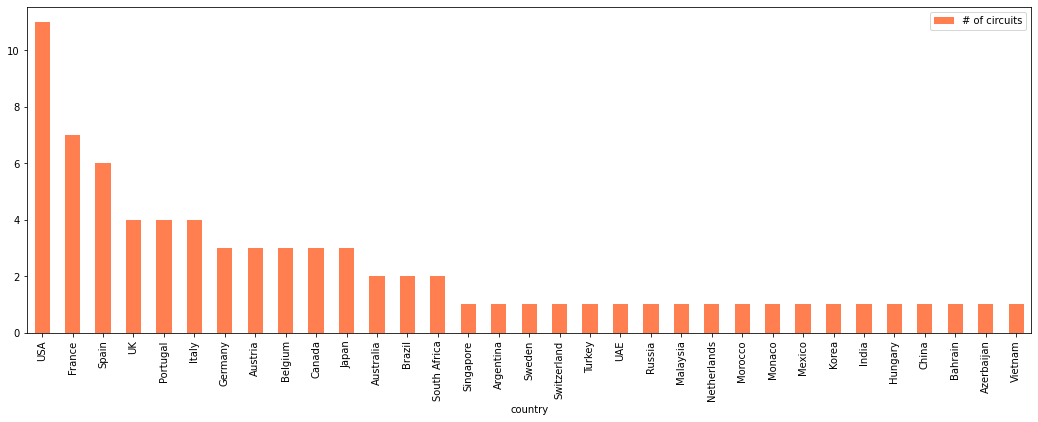

In [46]:
country_with_most_circuits.plot.bar(figsize=(18,6), color='coral')

### Ploting a box plot to see if there are any outliers as USA seems like one.

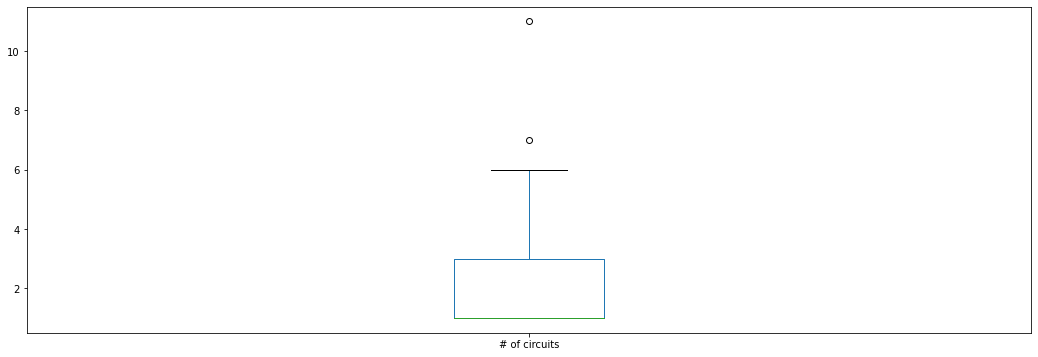

In [47]:
country_with_most_circuits.plot.box(figsize=(18,6))

In [48]:
## Both France and USA are outliers in count of circuits

In [49]:
country_with_most_circuits.describe()

,# of circuits
count,33.000000
mean,2.303030
std,2.200637
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,11.000000


In [50]:
country_with_most_circuits.median()

# of circuits    1.0
dtype: float64

In [51]:
country_with_most_circuits.mode()

,# of circuits
0,1


In [53]:
country_with_most_circuits.shape

(33, 1)

In [54]:
# F1 circuits are available in 33 countries

In [56]:
print(df_circuits[['name','location']])

                                    name      location
0         Albert Park Grand Prix Circuit     Melbourne
1           Sepang International Circuit  Kuala Lumpur
2          Bahrain International Circuit        Sakhir
3         Circuit de Barcelona-Catalunya      Montmeló
4                          Istanbul Park      Istanbul
..                                   ...           ...
71          Port Imperial Street Circuit    New Jersey
72                     Baku City Circuit          Baku
73                  Hanoi Street Circuit         Hanoi
74    Autódromo Internacional do Algarve      Portimão
75  Autodromo Internazionale del Mugello       Mugello

[76 rows x 2 columns]


### Name of all the circuits in America

In [59]:
american_circuits=df_circuits['country']=='USA'
american_circuits

0     False
1     False
2     False
3     False
4     False
      ...  
71     True
72    False
73    False
74    False
75    False
Name: country, Length: 76, dtype: bool

In [61]:
df_circuits[['name','location','country']].loc[american_circuits]

,name,location,country
18,Indianapolis Motor Speedway,Indianapolis,USA
32,Phoenix street circuit,Phoenix,USA
36,Detroit Street Circuit,Detroit,USA
41,Fair Park,Dallas,USA
42,Long Beach,California,USA
43,Las Vegas Street Circuit,Nevada,USA
45,Watkins Glen,New York State,USA
59,Riverside International Raceway,California,USA
62,Sebring International Raceway,Florida,USA
68,Circuit of the Americas,Austin,USA


# F1 Drivers

In [62]:
df_drivers=pd.read_csv("../Data/Formula 1 World Championship (1950 - 2020)/drivers.csv")
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [65]:
# Adding a column for birth year
df_drivers['birth_year']=pd.DatetimeIndex(df_drivers['dob']).year

In [66]:
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,birth_year
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1985
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,1977
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,1985
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,1981
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,1981


In [73]:
# Add Another column to determine the age of drivers based on current date
df_drivers['age']=pd.Timestamp.today().strftime("%Y-%m-%d")-df_drivers['dob']
df_drivers

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [74]:
date=pd.Timestamp.today().strftime("%Y-%m-%d")

In [81]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     848 non-null    int64 
 1   driverRef    848 non-null    object
 2   number       848 non-null    object
 3   code         848 non-null    object
 4   forename     848 non-null    object
 5   surname      848 non-null    object
 6   dob          848 non-null    object
 7   nationality  848 non-null    object
 8   url          847 non-null    object
 9   birth_year   848 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 66.4+ KB
